In [11]:
## first block of code is just importing the requirements of the project

import sys 
import os
import h5py
import pickle
from matplotlib import pyplot as plt

from scipy import ndimage as ndi
from scipy import stats as sstats

import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from random import shuffle
from tqdm import tqdm, tnrange, tqdm_notebook
import collections
import random
import mahotas 
from sklearn.preprocessing import normalize
from PIL import Image
import imutils
import logging

from glob import glob

In [12]:
# this block of code is importing all the various parts of the project from their respective modules
from icon_util_v2 import *
from methods_v2 import *
from aberrations import *

SyntaxError: invalid syntax (methods_v2.py, line 194)

In [ ]:
hdf5_file = h5py.File('LLD-icon.hdf5', 'r')
images, _ = (hdf5_file['data'], hdf5_file['labels/resnet/rc_64'])
# transpose the images because they're stored in a weird color channel first format, as indicated by shape[0] being 3
images = [np.transpose(i) if i.shape[0] == 3 else i for i in images[:100]]
print(len(images))

In [4]:
image_set_name = "icon100"
logdir = "Logs202105142singlebest"
if not os.path.exists("Logs/"+logdir):
        os.mkdir("Logs/"+logdir)
method_classes = [zernike_method, orb_method, neural_method, small_neural_method]
methods = [single_best_split_method(m) for m in method_classes] #+ [single_worst_split_method(m) for m in method_classes]# + [symmetric_best_split_method(m) for m in method_classes]# + [contour_method()]
#method_classes = [zernike_method, orb_method, neural_method, small_neural_method]
#methods=[m() for m in method_classes]

In [5]:
# run this to create databases, otherwise run the next cell to load prepared databases
#create_databases(images,methods,image_set_name)

In [6]:
methods = instantiate_databases(methods, image_set_name)

In [7]:
#####################
# main loop 	#####
#####################
run_in_chunks2(methods, images, aberrations, chunk_size=100, weights=[],          
    logdir=logdir)
print("Done")

Chunk: 1
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
Done


In [8]:
logdir = "Logs202105142singleworst"
if not os.path.exists("Logs/"+logdir):
        os.mkdir("Logs/"+logdir)
method_classes = [zernike_method, orb_method, neural_method, small_neural_method]
methods = [single_worst_split_method(m) for m in method_classes]# + [symmetric_best_split_method(m) for m in method_classes]# + [contour_method()]
create_databases(images,methods,image_set_name)
run_in_chunks2(methods, images, aberrations, chunk_size=100, weights=[],          
    logdir=logdir)
print("Done")

0
50
0
50
0
50
0
50
Chunk: 1
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
Done


In [7]:
logdir = "Logs202105142symmetricbest"
if not os.path.exists("Logs/"+logdir):
        os.mkdir("Logs/"+logdir)
method_classes = [zernike_method, orb_method, neural_method, small_neural_method]
methods = [symmetric_best_split_method(m) for m in method_classes]# + [contour_method()]
create_databases(images,methods,image_set_name)
methods = instantiate_databases(methods, image_set_name)
run_in_chunks2(methods, images, aberrations, chunk_size=100, weights=[],          
    logdir=logdir)
print("Done")

0
50
0
50
0
50
0
50
Chunk: 1
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
Done


In [3]:
logdir = "Logs20210625_first"
# Load all the logs into a single dataframe for processing
log_files = glob("Logs/"+logdir+"/*") # these are the logs that we're loading
print(log_files)
joined_logs = pd.concat([pd.read_csv(i) for i in log_files])
print(joined_logs)

['Logs/Logs20210625_first/results_5.csv', 'Logs/Logs20210625_first/results_3.csv', 'Logs/Logs20210625_first/results_10.csv', 'Logs/Logs20210625_first/results_6.csv', 'Logs/Logs20210625_first/results_7.csv', 'Logs/Logs20210625_first/results_2.csv', 'Logs/Logs20210625_first/results_1.csv', 'Logs/Logs20210625_first/results_8.csv', 'Logs/Logs20210625_first/results_9.csv', 'Logs/Logs20210625_first/results_11.csv', 'Logs/Logs20210625_first/results_4.csv']
              aberration                method      score  rank      time
0    ab_translate_border       Split_0_Zernike  96.038516    18  1.011422
1    ab_translate_border           Split_0_Orb  88.000000     6  1.216863
2    ab_translate_border        Split_0_Neural  94.469279    35  0.731625
3    ab_translate_border  Split_0_Small_Neural  83.779817    86  0.626157
4    ab_translate_border       combined_method  94.745640     2  0.000245
..                   ...                   ...        ...   ...       ...
595     ab_rotate_border    

Ranking


Text(0.5, 1.0, 'Small Neural')

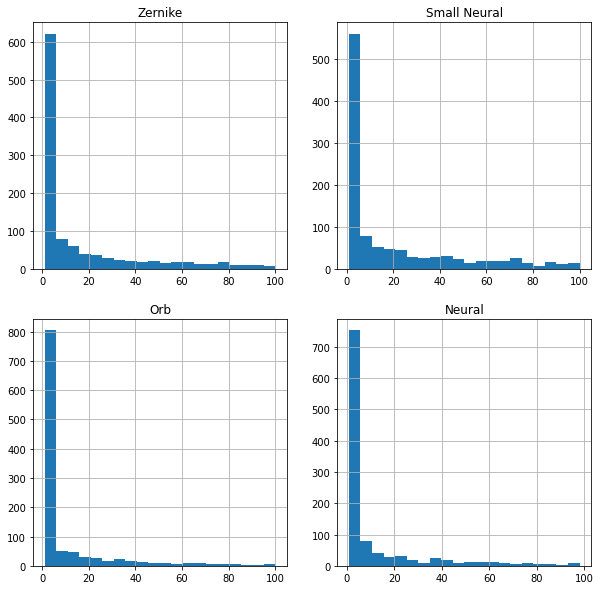

In [7]:
print("Ranking")
mpref=""
fig, axes = plt.subplots(nrows=2, ncols=2)
joined_logs[joined_logs['method']==mpref+'Split_0_Zernike']['rank'].hist(bins=20, figsize=(10,10), ax=axes[0,0])
axes[0,0].set_title('Zernike')
joined_logs[joined_logs['method']==mpref+'Split_0_Orb']['rank'].hist(bins=20, figsize=(10,10), ax=axes[1,0])
axes[1,0].set_title('Orb')
joined_logs[joined_logs['method']==mpref+'Split_0_Neural']['rank'].hist(bins=20, figsize=(10,10), ax=axes[1,1])
axes[1,1].set_title('Neural')
#joined_logs[joined_logs['method']=='euclidean_neural_method']['rank'].hist(bins=20, figsize=(10,10), ax=axes[2,1])
#axes[2,1].set_title('Your Ad Here')
joined_logs[joined_logs['method']==mpref+'Split_0_Small_Neural']['rank'].hist(bins=20, figsize=(10,10), ax=axes[0,1])
axes[0,1].set_title('Small Neural')
#joined_logs[joined_logs['method']=='trained_neural_method']['rank'].hist(bins=20, figsize=(10,10), ax=axes[3,1])
#axes[3,1].set_title('Trained Neural')

In [ ]:
# Load all the logs into a single dataframe for processing
logdir = "Logs202105082"
log_files = glob("Logs/"+logdir+"/*") # these are the logs that we're loading
print(log_files)
joined_logs = pd.concat([pd.read_csv(i) for i in log_files])
print(joined_logs)

In [20]:
joined_logs=joined_logs[joined_logs["aberration"]=="ab_draw"]

In [ ]:
print("Ranking")
fig, axes = plt.subplots(nrows=2, ncols=2)
joined_logs[joined_logs['method']=='Zernike']['rank'].hist(bins=20, figsize=(10,10), ax=axes[0,0])
axes[0,0].set_title('Zernike')
joined_logs[joined_logs['method']=='Orb']['rank'].hist(bins=20, figsize=(10,10), ax=axes[1,0])
axes[1,0].set_title('Orb')
joined_logs[joined_logs['method']=='Neural']['rank'].hist(bins=20, figsize=(10,10), ax=axes[1,1])
axes[1,1].set_title('Neural')
joined_logs[joined_logs['method']=='Small_Neural']['rank'].hist(bins=20, figsize=(10,10), ax=axes[0,1])
axes[0,1].set_title('Small Neural')


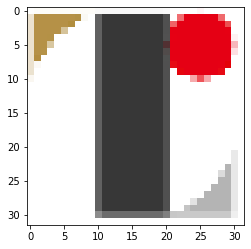

In [32]:
tokyo=cv2.cvtColor(cv2.imread('tokyo2.png'), cv2.COLOR_BGR2RGB)
tdl=cv2.cvtColor(cv2.imread('tdl2.png'), cv2.COLOR_BGR2RGB)
plt.imshow(tdl)

In [5]:
method = symmetric_best_split_method(neural_method)

In [6]:
m=split_method(neural_method)

In [24]:
splits=m.split_image(tdl)

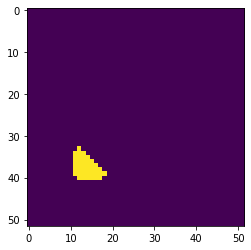

In [25]:
plt.imshow(splits[0])

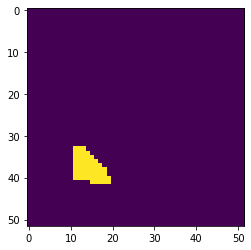

In [26]:
plt.imshow(splits[1])

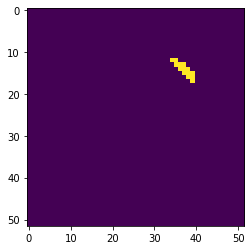

In [27]:
plt.imshow(splits[2])

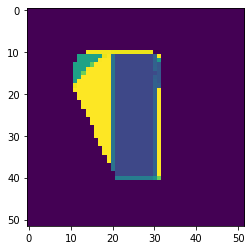

In [28]:
plt.imshow(splits[3])

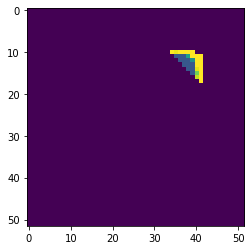

In [29]:
plt.imshow(splits[4])

In [30]:
plt.imshow(splits[5])

IndexError: list index out of range

In [18]:
a=np.array([1,2,3,4,5])

In [19]:
max(a)

5

In [20]:
import scipy

In [21]:
scipy.special.softmax([[1,2,3],[4,5,6],[7,8,9]], axis=0)

array([[0.00235563, 0.00235563, 0.00235563],
       [0.04731416, 0.04731416, 0.04731416],
       [0.95033021, 0.95033021, 0.95033021]])

In [22]:
a=0
b=0
if a==0 or b==0:
    print("ayo")
else:
    print("bayo")

ayo


In [13]:
dimgs =  m.split_image(tokyo)
#print(imgs)
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
imgs_comb = np.hstack( imgs )
plt.imshow(imgs_comb)

NameError: name 'imgs' is not defined

In [15]:
im1=images[3]

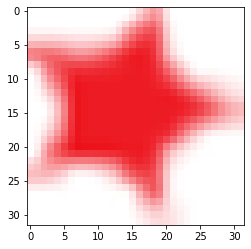

In [16]:
plt.imshow(im1)

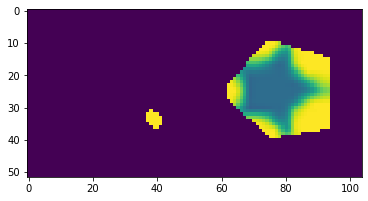

In [20]:
plt.imshow(np.hstack(m.split_image(im1)))

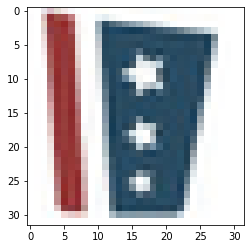

In [93]:
im2 = images[17]
plt.imshow(im2)

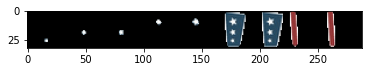

In [95]:
plt.imshow(np.hstack(m.split_image(im2)))

In [96]:
np.array(m.comparison_matrix(m.create_query(im1),m.create_query(im2)))

array([[77.69872248, 75.96357763, 77.44553685, 76.23385787, 76.54316127,
        81.83794022, 81.82625473, 82.72468448, 83.13207626],
       [86.56463623, 87.45976686, 85.41746736, 87.34719753, 88.22972178,
        79.1928798 , 79.5485884 , 85.61809957, 85.05166769],
       [88.19669485, 89.025563  , 87.05839813, 89.23489451, 90.16206264,
        79.28025723, 79.6664685 , 86.18196249, 85.91632247]])

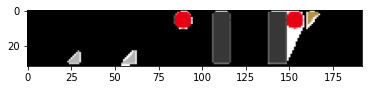

In [83]:
plt.imshow(np.hstack(m.split_image(tdl)))

In [76]:
mimg=aberrations[4](im1)

In [78]:
np.array(m.comparison_matrix(m.create_query(im1),m.create_query(mimg)))

array([[80.85224032, 79.40508127, 79.77683544, 78.35568488, 97.48887122],
       [87.15781569, 89.01494443, 93.09089482, 89.19131756, 84.77033973],
       [88.437289  , 90.40496051, 91.91595912, 91.36772454, 84.61306691]])

In [10]:
joined_logs["method"].unique()

array(['Split_0_Zernike', 'Split_0_Orb', 'Split_0_Neural',
       'Split_0_Small_Neural', 'combined_method', 'uwcombined_method'],
      dtype=object)